## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [46]:
from keras.layers import Dense,BatchNormalization,Activation
def build_mlp(nurons = [512,256,128]):
    model = keras.models.Sequential()
    model.add(Dense(units = 512,input_dim = x_train.shape[-1]))
    for index,nuron in enumerate(nurons):
        model.add(Dense(units = nuron))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
    model.add(Dense(units = 10,activation = 'softmax'))
    return model

In [48]:
"""Code Here
設定超參數
"""
batch_size = [16, 32, 128, 256]
epoch = 40
learning_rate = 1e-3
momentum = .9

In [44]:
def train_model(batch_size):
    result = {}
    model = build_mlp()
    optimizer = keras.optimizers.SGD(lr = learning_rate,momentum = momentum,nesterov = True)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    model.fit(x_train,y_train,
             batch_size = batch_size,
             epochs = epoch,
             validation_data = (x_test,y_test),shuffle = True)
    
    history = model.history.history
    index_name = 'batch_size:%s'%(batch_size)
    result[index_name] = {'val_loss':history['val_loss'],
                         'loss':history['loss'],
                         'val_accuracy':history['val_accuracy'],
                         'accuracy':history['accuracy']}
    return result

In [49]:
results = []
for size in batch_size:
    results.append(train_model(size))

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 53s 1ms/step - loss: 1.7340 - accuracy: 0.3824 - val_loss: 1.6506 - val_accuracy: 0.4080
Epoch 2/40
50000/50000 [==============================] - 52s 1ms/step - loss: 1.5412 - accuracy: 0.4524 - val_loss: 1.5257 - val_accuracy: 0.4573
Epoch 3/40
50000/50000 [==============================] - 51s 1ms/step - loss: 1.4489 - accuracy: 0.4861 - val_loss: 1.5023 - val_accuracy: 0.4614
Epoch 4/40
50000/50000 [==============================] - 52s 1ms/step - loss: 1.3861 - accuracy: 0.5085 - val_loss: 1.4132 - val_accuracy: 0.4904
Epoch 5/40
50000/50000 [==============================] - 51s 1ms/step - loss: 1.3360 - accuracy: 0.5265 - val_loss: 1.3990 - val_accuracy: 0.4933
Epoch 6/40
50000/50000 [==============================] - 53s 1ms/step - loss: 1.2928 - accuracy: 0.5429 - val_loss: 1.4089 - val_accuracy: 0.4998
Epoch 7/40
50000/50000 [==============================] - 52s 1ms/st

50000/50000 [==============================] - 32s 645us/step - loss: 0.7979 - accuracy: 0.7201 - val_loss: 1.5485 - val_accuracy: 0.4856
Epoch 16/40
50000/50000 [==============================] - 28s 568us/step - loss: 0.7675 - accuracy: 0.7301 - val_loss: 1.5866 - val_accuracy: 0.4861
Epoch 17/40
50000/50000 [==============================] - 25s 504us/step - loss: 0.7328 - accuracy: 0.7430 - val_loss: 1.6625 - val_accuracy: 0.4726
Epoch 18/40
50000/50000 [==============================] - 34s 674us/step - loss: 0.7052 - accuracy: 0.7517 - val_loss: 1.5652 - val_accuracy: 0.5038
Epoch 19/40
50000/50000 [==============================] - 30s 592us/step - loss: 0.6843 - accuracy: 0.7591 - val_loss: 1.6931 - val_accuracy: 0.4807
Epoch 20/40
50000/50000 [==============================] - 28s 559us/step - loss: 0.6486 - accuracy: 0.7707 - val_loss: 1.7217 - val_accuracy: 0.4810
Epoch 21/40
50000/50000 [==============================] - 41s 813us/step - loss: 0.6174 - accuracy: 0.7813 - va

50000/50000 [==============================] - 9s 172us/step - loss: 0.2928 - accuracy: 0.9168 - val_loss: 2.1530 - val_accuracy: 0.4489
Epoch 30/40
50000/50000 [==============================] - 7s 145us/step - loss: 0.2710 - accuracy: 0.9243 - val_loss: 1.9950 - val_accuracy: 0.4847
Epoch 31/40
50000/50000 [==============================] - 7s 142us/step - loss: 0.2573 - accuracy: 0.9273 - val_loss: 2.0364 - val_accuracy: 0.4798
Epoch 32/40
50000/50000 [==============================] - 7s 142us/step - loss: 0.2313 - accuracy: 0.9388 - val_loss: 2.0995 - val_accuracy: 0.4701
Epoch 33/40
50000/50000 [==============================] - 8s 151us/step - loss: 0.2165 - accuracy: 0.9412 - val_loss: 2.1999 - val_accuracy: 0.4600
Epoch 34/40
50000/50000 [==============================] - 7s 148us/step - loss: 0.1991 - accuracy: 0.9476 - val_loss: 2.3334 - val_accuracy: 0.4442
Epoch 35/40
50000/50000 [==============================] - 8s 151us/step - loss: 0.1882 - accuracy: 0.9507 - val_loss:

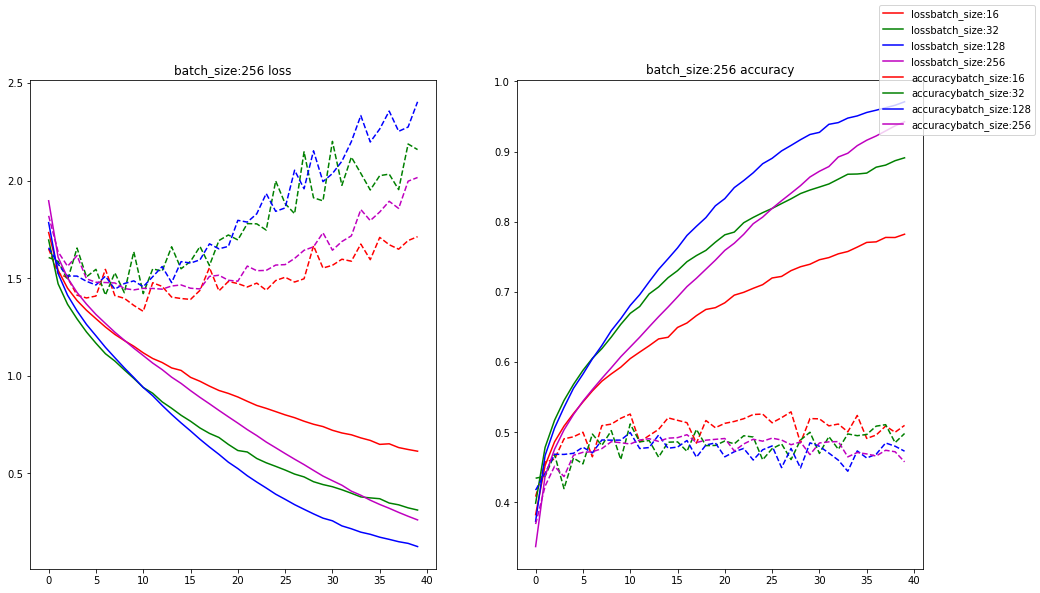

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axes = plt.subplots(1,2,sharex = True)
fig.set_size_inches(16,9)
colors = ['r','g','b','m']
for batch_type,result in enumerate(results):
    for index,name in enumerate(result):
        axes[0].plot(range(epoch),result[name]['val_loss'],'--',color = colors[batch_type])
        axes[0].plot(range(epoch),result[name]['loss'],'-',label = 'loss' +name,color = colors[batch_type])
        axes[1].plot(range(epoch),result[name]['val_accuracy'],'--',color = colors[batch_type])
        axes[1].plot(range(epoch),result[name]['accuracy'],'-',label = 'accuracy' + name,color = colors[batch_type])
    axes[0].set_title(name + ' loss')
    axes[1].set_title(name + ' accuracy')
fig.legend(loc = 'upper right')
plt.show()

In [62]:
for i in results[0]:
    print(i)

batch_size:16
